**Introduction**

The focus of modern healthcare system has been increasingly shifting from treatment to prevention. To effectively prevent a medical condition, it is essential to understand which factors are most closely associated with its occurrence. The objective of this project is to identify which of the eight predictors in the dataset most accurately indicates the presence of diabetes by determining the variable that shows the most significant correlation with diabetes. Taking a step further, I will explore whether any of the remaining variables are meaningfully associated with this key predictor.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
cols = list(df.columns)
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Duplicates detection
df.duplicated().sum()

0

In [7]:
# Null value detection 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Outlier detection by z-score method
means = []
stds = []
for col in cols[:-1]:
    means.append(np.mean(df[col].values))
    stds.append(np.std(df[col].values))

df_dropped = df
for col_idx, col in enumerate(cols[:-1]):
    df_dropped = df_dropped[(-3*stds[col_idx] <= df_dropped[col] - means[col_idx]) &
    (df_dropped[col] - means[col_idx] <= 3*stds[col_idx])]

df_dropped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


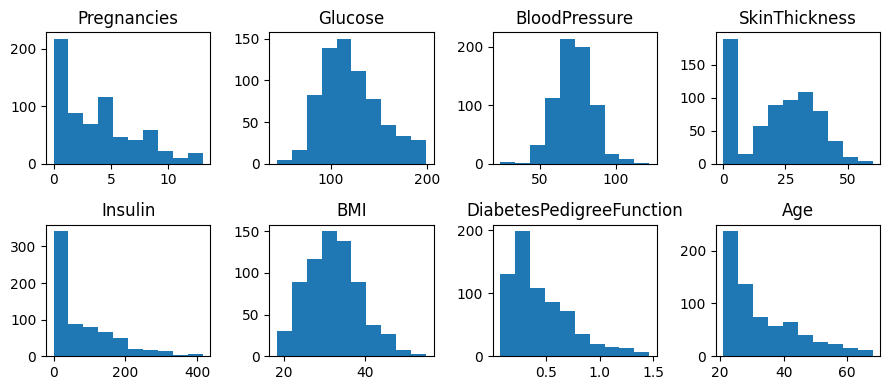

In [9]:
# Depict the distribution of each predictor variable using histogram
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,4, figsize = (9,4))
for idx, ax in enumerate(axes.flat):
    ax.hist(df_dropped[cols[idx]].values, bins=10)
    ax.set_title(cols[idx])

fig.tight_layout()
plt.show()

Pregnancies                   3.325380
Glucose                     110.223427
BloodPressure                70.770065
SkinThickness                20.175705
Insulin                      65.553145
BMI                          30.825813
DiabetesPedigreeFunction      0.411885
Age                          31.119306
Outcome                       0.000000
dtype: float64
Pregnancies                   4.903084
Glucose                     140.744493
BloodPressure                75.546256
SkinThickness                22.030837
Insulin                      86.629956
BMI                          35.018502
DiabetesPedigreeFunction      0.541211
Age                          37.105727
Outcome                       1.000000
dtype: float64


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.156470       0.229881      -0.097721   
Glucose                      0.156470  1.000000       0.240560       0.008577   
BloodPressure          

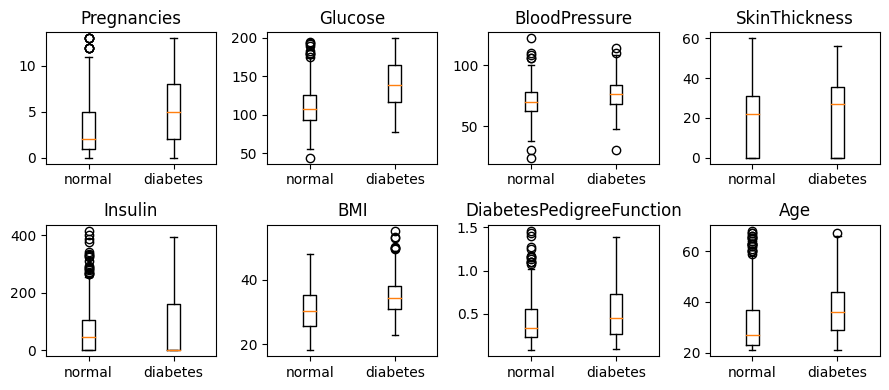

In [10]:
# Identify the predictor that has the strongest correlation with the outcome
# 1. Intuitive
no_diabetes = df_dropped[df_dropped['Outcome'] == 0]
yes_diabetes = df_dropped[df_dropped['Outcome'] == 1]

no_diabetes_means = no_diabetes.mean(numeric_only = True)
yes_diabetes_means = yes_diabetes.mean(numeric_only = True)

print(no_diabetes_means)
print(yes_diabetes_means)
print("\n")

# 2. Correlation coefficient matrix 
correlation_matrix = df_dropped.corr()
print(correlation_matrix)
print("\n")

# 3. Spearman correlation
for col in cols[:-1]:
    correlation_spearman = df_dropped[col].corr(df_dropped['Outcome'], method='spearman')
    print(correlation_spearman)
print("\n")

# Visualization: Box plot
fig, axes = plt.subplots(2,4, figsize=(9,4))

for idx, ax in enumerate(axes.flatten()):
    data_to_plot = [no_diabetes[cols[idx]], yes_diabetes[cols[idx]]]
    ax.boxplot(data_to_plot, labels=['normal', 'diabetes'])
    ax.set_title(cols[idx])

fig.tight_layout()
plt.show()

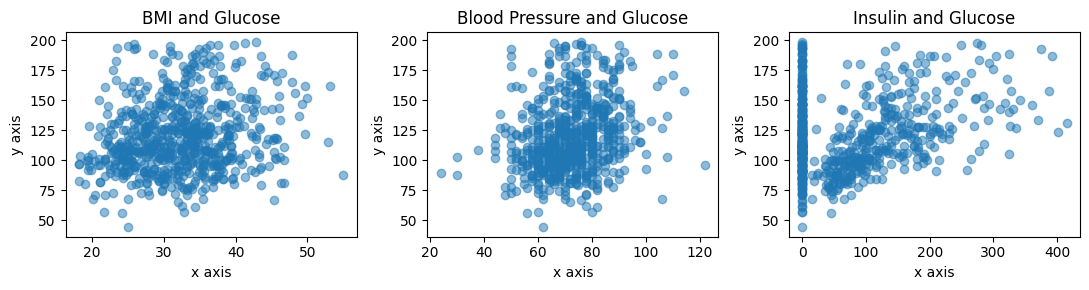

In [11]:
# 3 predictors correlated with Glucose
fig, axes = plt.subplots(1,3, figsize=(11,3))

axes[0].scatter(df_dropped['BMI'], df_dropped['Glucose'], alpha=0.5)
axes[0].set_title("BMI and Glucose")
axes[0].set_xlabel("x axis")
axes[0].set_ylabel("y axis")

axes[1].scatter(df_dropped['BloodPressure'], df_dropped['Glucose'], alpha=0.5)
axes[1].set_title("Blood Pressure and Glucose")
axes[1].set_xlabel("x axis")
axes[1].set_ylabel("y axis")

axes[2].scatter(df_dropped['Insulin'], df_dropped['Glucose'], alpha=0.5)
axes[2].set_title("Insulin and Glucose")
axes[2].set_xlabel("x axis")
axes[2].set_ylabel("y axis")

fig.tight_layout()
plt.show()

**Conclusion**

The findings from this exploratory data analysis suggest that glucose levels may serve as an effective 
predictor of diabetes. Additionally, variables such as BMI, blood pressure, and insulin levels show a meaningful positive correlation with glucose level. While a formal diagnosis of diabetes must be made through clinical procedures, these results offer individuals more accessible indicators that can help them monitor their potential risk in everyday life.